<div class="toc"><ul class="toc-item"><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data preparation</a></span><ul class="toc-item"><li><span><a href="#Cleaning-and-lemmatization" data-toc-modified-id="Cleaning-and-lemmatization-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Cleaning and lemmatization</a></span></li><li><span><a href="#Length-of-toxic-and-non-toxic-comments" data-toc-modified-id="Length-of-toxic-and-non-toxic-comments-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Length of toxic and non toxic comments</a></span></li><li><span><a href="#Bag-of-wors" data-toc-modified-id="Bag-of-wors-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Bag of wors</a></span><ul class="toc-item"><li><span><a href="#Corpus" data-toc-modified-id="Corpus-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Corpus</a></span></li><li><span><a href="#Toxic-comments" data-toc-modified-id="Toxic-comments-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Toxic comments</a></span></li><li><span><a href="#Non-toxic-comments" data-toc-modified-id="Non-toxic-comments-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Non-toxic comments</a></span></li></ul></li><li><span><a href="#Samples" data-toc-modified-id="Samples-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Samples</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Machine-learning" data-toc-modified-id="Machine-learning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Machine learning</a></span><ul class="toc-item"><li><span><a href="#TFIDF" data-toc-modified-id="TFIDF-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>TFIDF</a></span></li><li><span><a href="#Log-regression" data-toc-modified-id="Log-regression-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Log regression</a></span></li><li><span><a href="#Random-forest" data-toc-modified-id="Random-forest-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Random forest</a></span></li><li><span><a href="#LGBM" data-toc-modified-id="LGBM-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>LGBM</a></span></li><li><span><a href="#Comparison" data-toc-modified-id="Comparison-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Comparison</a></span></li><li><span><a href="#The-best-model-of-test-sample" data-toc-modified-id="The-best-model-of-test-sample-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>The best model of test sample</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Conclusion</a>


 # Project for text analysis
 
 The hypothetical e-commerce platform is launching a new feature where users can edit and enhance product descriptions, similar to wiki communities. This means that customers can propose edits and comment on changes made by others. The store requires a tool that can identify toxic comments and flag them for moderation.

The project's objective is to train a model to classify comments as positive or negative, utilizing a dataset with labels for comment toxicity. The dataset includes two columns: "text" for the comment text and "toxic" for the target variable.

The project aims to achieve a minimum F1 quality metric of 0.75.



## Data preparation

In [1]:
import numpy as np
import pandas as pd

from nltk.corpus import stopwords
import re 
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from tqdm import tqdm, tqdm_notebook, notebook
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.dummy import DummyClassifier



In [2]:
data=pd.read_csv('/datasets/toxic_comments.csv', index_col=0)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


In [4]:
data.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [5]:
pd.set_option('display.max_columns', None)

In [6]:
#Duplicates
data.duplicated().sum()

0

In [7]:
#Class balance
data['toxic'].value_counts()

0    143106
1     16186
Name: toxic, dtype: int64

### Cleaning and lemmatization

In [8]:
def clean_text(text):
    text = re.sub(r"(?:\n|\r)", " ", text)
    text = re.sub(r"[^a-zA-Z ]", "", text).strip()
    text=text.lower()
    return text 

In [9]:
data['clean_text'] = data['text'].apply(clean_text)

In [10]:
data

,text,toxic,clean_text
0,Explanation\nWhy the edits made under my usern...,0,explanation why the edits made under my userna...
1,D'aww! He matches this background colour I'm s...,0,daww he matches this background colour im seem...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man im really not trying to edit war its j...
3,"""\nMore\nI can't make any real suggestions on ...",0,more i cant make any real suggestions on impro...
4,"You, sir, are my hero. Any chance you remember...",0,you sir are my hero any chance you remember wh...
...,...,...,...
159446,""":::::And for the second time of asking, when ...",0,and for the second time of asking when your vi...
159447,You should be ashamed of yourself \n\nThat is ...,0,you should be ashamed of yourself that is a ...
159448,"Spitzer \n\nUmm, theres no actual article for ...",0,spitzer umm theres no actual article for pro...
159449,And it looks like it was actually you who put ...,0,and it looks like it was actually you who put ...


In [11]:
#Lemmatization
disabled_pipes = [ "parser",  "ner"]
nlp = spacy.load('en_core_web_sm', disable=disabled_pipes)
def lemmatize(text):
    part = []
    for token in nlp(text):
        if token.is_stop == False: 
            part.append(token.lemma_)
    return " ".join(part)

In [12]:
tqdm.pandas() #progress
data['lemma'] = data['clean_text'].progress_apply(lemmatize) 

100%|██████████| 159292/159292 [18:45<00:00, 141.56it/s]


In [13]:
data.head()

,text,toxic,clean_text,lemma
0,Explanation\nWhy the edits made under my usern...,0,explanation why the edits made under my userna...,explanation edit username hardcore metallica f...
1,D'aww! He matches this background colour I'm s...,0,daww he matches this background colour im seem...,daww match background colour m seemingly stuck...
2,"Hey man, I'm really not trying to edit war. It...",0,hey man im really not trying to edit war its j...,hey man m try edit war guy constantly remove r...
3,"""\nMore\nI can't make any real suggestions on ...",0,more i cant make any real suggestions on impro...,not real suggestion improvement wonder secti...
4,"You, sir, are my hero. Any chance you remember...",0,you sir are my hero any chance you remember wh...,sir hero chance remember page s


### Length of toxic and non toxic comments

In [14]:
data['len_com'] = data['text'].apply(len)

In [15]:
data.head()

,text,toxic,clean_text,lemma,len_com
0,Explanation\nWhy the edits made under my usern...,0,explanation why the edits made under my userna...,explanation edit username hardcore metallica f...,264
1,D'aww! He matches this background colour I'm s...,0,daww he matches this background colour im seem...,daww match background colour m seemingly stuck...,112
2,"Hey man, I'm really not trying to edit war. It...",0,hey man im really not trying to edit war its j...,hey man m try edit war guy constantly remove r...,233
3,"""\nMore\nI can't make any real suggestions on ...",0,more i cant make any real suggestions on impro...,not real suggestion improvement wonder secti...,622
4,"You, sir, are my hero. Any chance you remember...",0,you sir are my hero any chance you remember wh...,sir hero chance remember page s,67


In [16]:
data['len_com'].describe()

count    159292.000000
mean        393.691303
std         590.111825
min           5.000000
25%          95.000000
50%         205.000000
75%         435.000000
max        5000.000000
Name: len_com, dtype: float64

In [17]:
toxic= data[data['toxic']==1]
non_toxic = data[data['toxic']==0]


In [18]:
toxic['len_com'].describe()

count    16186.000000
mean       302.932411
std        618.647890
min          5.000000
25%         61.000000
50%        128.000000
75%        282.750000
max       5000.000000
Name: len_com, dtype: float64

In [19]:
non_toxic['len_com'].describe()

count    143106.000000
mean        403.956585
std         585.914845
min           6.000000
25%         102.000000
50%         216.000000
75%         452.000000
max        5000.000000
Name: len_com, dtype: float64

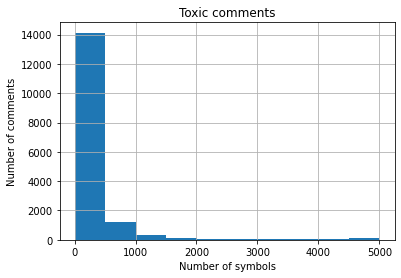

In [20]:
toxic['len_com'].hist()
plt.xlabel('Number of symbols')
plt.ylabel('Number of comments')
plt.title('Toxic comments')
plt.show()

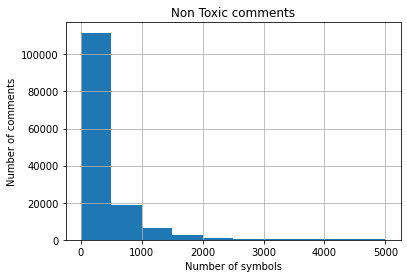

In [21]:
non_toxic['len_com'].hist()
plt.xlabel('Number of symbols')
plt.ylabel('Number of comments')
plt.title('Non Toxic comments')
plt.show()

Non-toxic comments are, on average, slightly longer than toxic ones, but they exhibit a similar distribution.

### Bag of wors

#### Corpus

In [22]:
corpus = data['lemma']

In [23]:
count_vect = CountVectorizer(max_features=30) 

In [24]:
bow = count_vect.fit_transform(corpus)
print("Bow shape:", bow.shape)

Bow shape: (159292, 30)


In [25]:
count_vect.get_feature_names()

['add',
 'article',
 'block',
 'change',
 'comment',
 'delete',
 'edit',
 'find',
 'good',
 'know',
 'like',
 'link',
 'look',
 'need',
 'not',
 'page',
 'people',
 'remove',
 'say',
 'source',
 'talk',
 'thank',
 'think',
 'time',
 'use',
 'user',
 've',
 'want',
 'wikipedia',
 'work']

#### Toxic comments

In [26]:
toxic.head()

,text,toxic,clean_text,lemma,len_com
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,cocksucker before you piss around on my work,cocksucker piss work,44
12,Hey... what is it..\n@ | talk .\nWhat is it......,1,hey what is it talk what is it an exclusive...,hey talk exclusive group wp talibanswho g...,319
16,"Bye! \n\nDon't look, come or think of comming ...",1,bye dont look come or think of comming back ...,bye not look come think comme tosser,57
42,You are gay or antisemmitian? \n\nArchangel WH...,1,you are gay or antisemmitian archangel white...,gay antisemmitian archangel white tiger m...,648
43,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,fuck your filthy mother in the ass dry,fuck filthy mother ass dry,40


In [27]:
corpus_toxic = list(toxic['lemma'])

In [28]:
count_vect_toxic = CountVectorizer(max_features=30) #смотрю 30 слов

In [29]:
bow_toxic = count_vect_toxic.fit_transform(corpus_toxic)
print("Bow shape for toxis comments:", bow_toxic.shape)

Bow shape for toxis comments: (16186, 30)


In [30]:
count_vect_toxic.get_feature_names()

['article',
 'ass',
 'bitch',
 'block',
 'cunt',
 'dick',
 'die',
 'edit',
 'faggot',
 'fat',
 'fuck',
 'fucking',
 'gay',
 'hate',
 'hi',
 'know',
 'like',
 'moron',
 'nigger',
 'not',
 'page',
 'people',
 'shit',
 'stop',
 'stupid',
 'suck',
 'talk',
 'think',
 'want',
 'wikipedia']

#### Non-toxic comments

In [31]:
non_toxic.head()

,text,toxic,clean_text,lemma,len_com
0,Explanation\nWhy the edits made under my usern...,0,explanation why the edits made under my userna...,explanation edit username hardcore metallica f...,264
1,D'aww! He matches this background colour I'm s...,0,daww he matches this background colour im seem...,daww match background colour m seemingly stuck...,112
2,"Hey man, I'm really not trying to edit war. It...",0,hey man im really not trying to edit war its j...,hey man m try edit war guy constantly remove r...,233
3,"""\nMore\nI can't make any real suggestions on ...",0,more i cant make any real suggestions on impro...,not real suggestion improvement wonder secti...,622
4,"You, sir, are my hero. Any chance you remember...",0,you sir are my hero any chance you remember wh...,sir hero chance remember page s,67


In [32]:
corpus_nontoxic = list(non_toxic['lemma'])

In [33]:
count_vect_nontoxic = CountVectorizer(max_features=30) #смотрю 30 слов

In [34]:
bow_nontoxic = count_vect_nontoxic.fit_transform(corpus_nontoxic)
print("Bow shape for non toxic comments :", bow_nontoxic.shape)

Bow shape for non toxic comments : (143106, 30)


In [35]:
count_vect_nontoxic.get_feature_names()

['add',
 'article',
 'block',
 'comment',
 'delete',
 'edit',
 'find',
 'good',
 'help',
 'know',
 'like',
 'link',
 'look',
 'need',
 'not',
 'page',
 'people',
 'remove',
 'say',
 'source',
 'talk',
 'thank',
 'think',
 'time',
 'use',
 'user',
 've',
 'want',
 'wikipedia',
 'work']

### Samples

In [36]:
target=data['toxic']
features = data['lemma']

In [37]:
#Samples formation

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.8, random_state=42, stratify=target
)

features_valid, features_test, target_valid, target_test = train_test_split(features_valid,
    target_valid,test_size=0.5,random_state=42, stratify=target_valid,
)

print("Target train:", target_train.shape)
print("Target test:", target_test.shape)
print("Target validation:", target_valid.shape)

print("Features train:", features_train.shape)
print("Features test:", features_test.shape)
print("Features validation:", features_valid.shape)



Target train: (31858,)
Target test: (63717,)
Target validation: (63717,)
Features train: (31858,)
Features test: (63717,)
Features validation: (63717,)


In [38]:
#Class balance
target_train.value_counts(normalize = 1)

0    0.898393
1    0.101607
Name: toxic, dtype: float64

Train sample


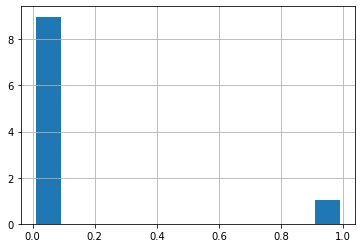

In [39]:
print('Train sample')
target_train.hist(density=True, histtype='bar', rwidth=0.8);

In [40]:
target_test.value_counts(normalize = 1)

0    0.898394
1    0.101606
Name: toxic, dtype: float64

Test sample


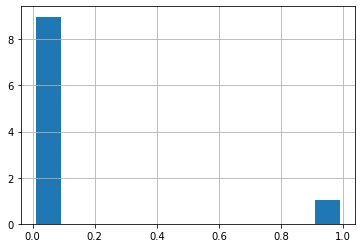

In [41]:
print('Test sample')
target_test.hist(density=True, histtype='bar', rwidth=0.8);

In [42]:
target_valid.value_counts(normalize = 1)

0    0.898379
1    0.101621
Name: toxic, dtype: float64

Validation sample


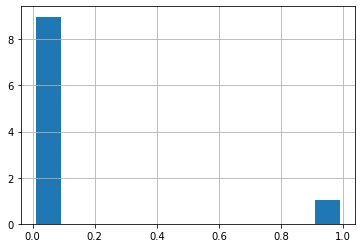

In [43]:
print('Validation sample')
target_valid.hist(density=True, histtype='bar', rwidth=0.8);

### Summary

1. The data has been preprocessed using regular expressions and lemmatization.
2. Non-toxic comments are slightly longer than toxic ones, but the size of their word bags is smaller. Moreover, the characteristic words for both types of comments differ.
3. Datasets have been prepared for further training.
4. Class imbalance is observed, and I will address it by applying class weighting.

## Machine learning

### TFIDF

In [44]:
stopwords = stopwords.words('english')
count_tfidf = TfidfVectorizer(stop_words=stopwords)
tfidf_train = count_tfidf.fit_transform(features_train)
tfidf_valid = count_tfidf.transform(features_valid)
tfidf_test = count_tfidf.transform(features_test)

### Log regression


In [45]:
log_model = LogisticRegression(random_state=42, solver='liblinear',class_weight = 'balanced', C=5) 
log_model.fit(tfidf_train, target_train) 
log_predict=log_model.predict(tfidf_valid)
f1_score_log=f1_score(target_valid, log_predict)

print('F1 log regression:', f1_score_log )


F1 log regression: 0.7502985074626866


### Random forest

In [46]:
best_result = 0
best_est = 0
best_depth = 0
best_split_rf = 0

for est in range(10, 50, 10):
    for depth in range(1, 10):
        for split_rf in range(2, 10):
            model = RandomForestClassifier(
                max_depth=depth,
                random_state=42,
                n_estimators=est,
                min_samples_split=split_rf,
                class_weight="balanced",
            )
            model.fit(tfidf_train, target_train)
            predictions_valid_rf = model.predict(tfidf_valid)
            result = f1_score(target_valid, predictions_valid_rf)
            if result > best_result:
                best_result = result
                best_est = est
                best_depth = depth
                best_split_rf = split_rf


f1_score_rf=best_result

print(
    "F1 best model:",
    f1_score_rf,
    "The number of trees in the forest:",
    best_est,
    "The maximum depth of the tree:",
    best_depth,
    "The minimum number of samples required to split an internal node:",
    best_split_rf,
)


F1 best model: 0.5197811781495282 The number of trees in the forest: 30 The maximum depth of the tree: 4 The minimum number of samples required to split an internal node: 2


### LGBM

In [47]:
best_result = 0
best_num = 0

for leaves in range (10, 30, 10):
            model = lgb.LGBMClassifier(
                num_leaves=leaves,
                random_state=42,
                learning_rate=0.3,
                is_unbalance = True,
            )
            model.fit(tfidf_train, target_train)
            predictions_valid_lgb = model.predict(tfidf_valid)
            result = f1_score(target_valid, predictions_valid_lgb)
            if result > best_result:
                best_result = result
                best_num = leaves
            


f1_score_lgb=best_result

print(
    "F1  LGBM:",
    f1_score_lgb,
    "The number of leaves:",
    best_num,
)


F1  LGBM: 0.7212235430559583 The number of leaves: 20


### Comparison

In [52]:
index = ['Log regression',
         'Random forest',
        'LGBM']
table = {'F1 on validation sample':[f1_score_log,f1_score_rf, f1_score_lgb]}

result = pd.DataFrame(data=table, index=index)

result

,F1 on validation sample
Log regression,0.750299
Random forest,0.519781
LGBM,0.721224


### The best model of test sample

In [49]:
model = LogisticRegression(random_state=42, solver='liblinear', class_weight = 'balanced', C=5) 
model.fit(tfidf_train, target_train)
target_predict = model.predict(tfidf_test)
print ('F1 on test sample', f1_score(target_test, target_predict))

F1 on test sample 0.7535906642728905


In [50]:
#Constant model
dummy = DummyClassifier(strategy="stratified")
dummy.fit(tfidf_train, target_train)
predict_dummy = dummy.predict(tfidf_test)
f1_dummy = f1_score(target_test, predict_dummy)
print('F1 dummy', f1_dummy)

F1 dummy 0.09816139703054082


## Conclusion

1. Text data has been cleaned and lemmatized.
2. The most characteristic words in the toxic and non-toxic comment corpora have been identified.
3. Three models were considered: logistic regression, random forest, and LGBM. Class weighting was used to address the class imbalance issue.
4. The logistic regression model performs the best, achieving an F1 score of 75.4 on the test data. The model passes the adequacy test.